In [93]:
# System and utilities
import os
import sys
import warnings
warnings.filterwarnings("ignore")

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn (Data Prep & Evaluation)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
)

# Linear Models
from sklearn.linear_model import (
    LinearRegression, ElasticNet, LogisticRegression
)

# Tree-based Models
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor,
)

# Advanced Gradient Boosting
from xgboost import XGBRegressor


In [94]:
path = r'/kaggle/input/boston/boston.csv'
df = pd.read_csv(path)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [95]:
df.shape

(506, 14)

In [96]:
df = df.drop_duplicates()

In [97]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [98]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [99]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### EDA


<Axes: xlabel='MEDV', ylabel='Count'>

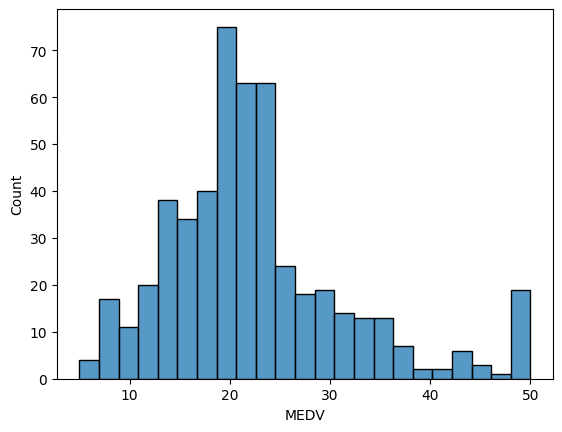

In [100]:
target = 'MEDV'
sns.histplot(df[target])

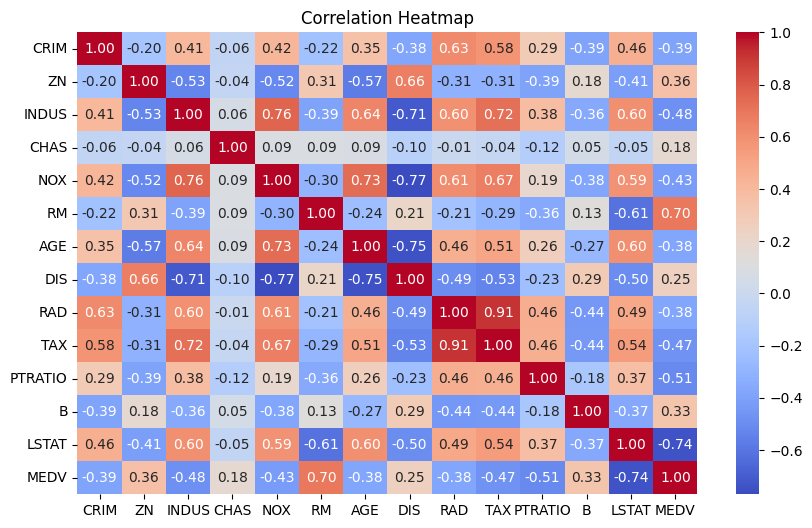

In [101]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

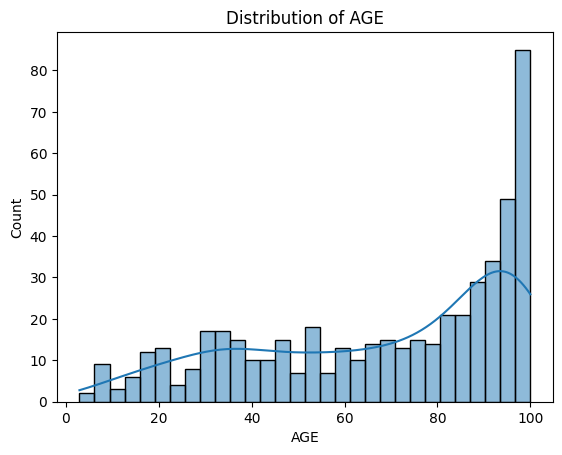

In [102]:
sns.histplot(df["AGE"], kde=True, bins=30)
plt.title("Distribution of AGE")
plt.show()

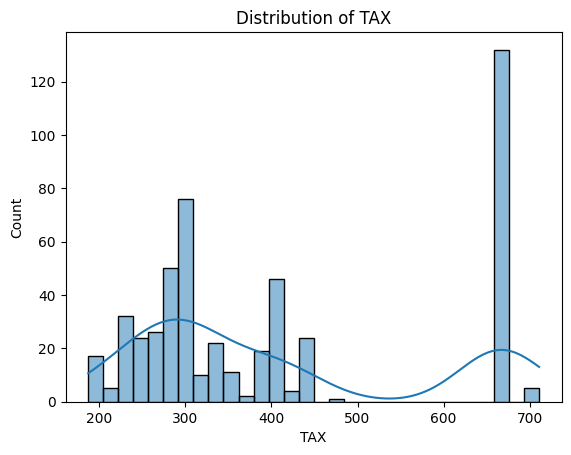

In [103]:
sns.histplot(df["TAX"], kde=True, bins=30)
plt.title("Distribution of TAX")
plt.show()

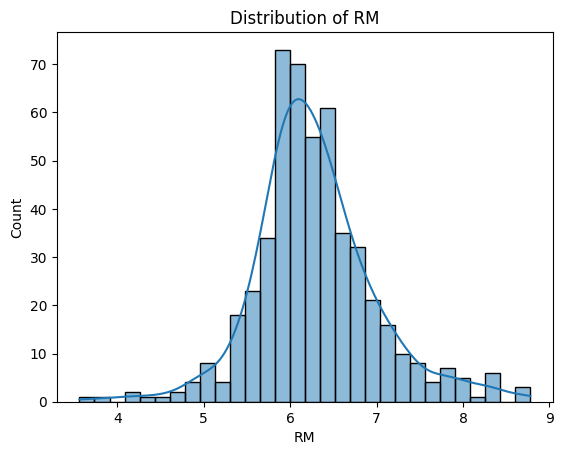

In [104]:
sns.histplot(df["RM"], kde=True, bins=30)
plt.title("Distribution of RM")
plt.show()

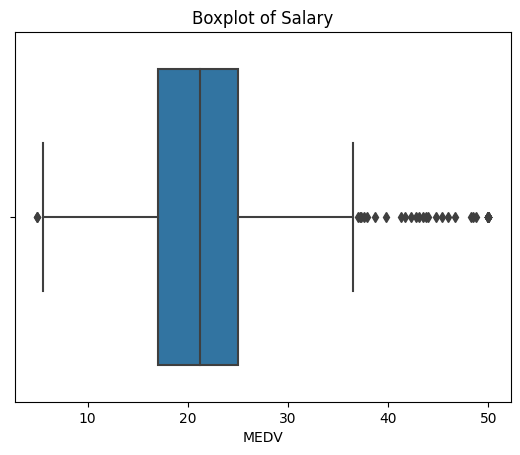

In [105]:
sns.boxplot(x=df["MEDV"])
plt.title("Boxplot of Salary")
plt.show()

In [106]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_clean = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df_clean

df = remove_outliers_iqr(df, 'MEDV')

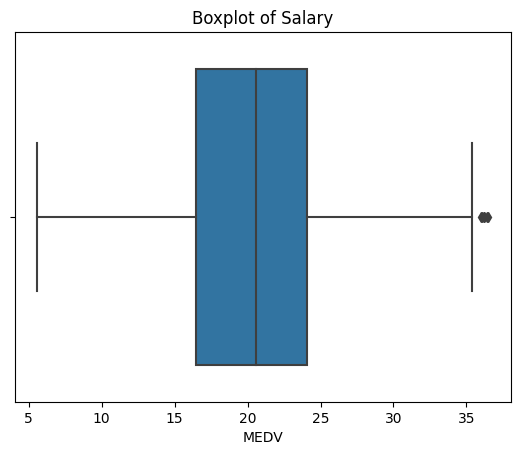

In [107]:
sns.boxplot(x=df["MEDV"])
plt.title("Boxplot of Salary")
plt.show()

#### Spliting data into X_train, X_test, y_train, y_test

#### Creating Pipeline

In [108]:
def build_preprocessor(num_features, cat_features, 
                       num_strategy="median", cat_strategy="most_frequent"):
    
    # Numeric pipeline
    num_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy=num_strategy)),
        ('scaler', StandardScaler())
    ])
    
    # Categorical pipeline
    cat_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy=cat_strategy, fill_value="missing")),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    # Combine 
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_pipeline, num_features),
            ('cat', cat_pipeline, cat_features)
        ]
    )
    
    return preprocessor

In [109]:
target = 'MEDV'

# Numeric features excluding target
num_features = df.select_dtypes(include='number').columns.drop(target).tolist()

# Categorical features
cat_features = df.select_dtypes(include='object').columns.tolist()

# Build preprocessor
preprocessor = build_preprocessor(num_features=num_features, cat_features=cat_features)


In [110]:
def split_data(df, target):
    """
    X_train, X_test, y_train, y_test : arrays / DataFrames
    """
    X = df.drop(target, axis=1)
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = split_data(df, 'MEDV')

#### model training and hyper paramerts

In [111]:
reg_models = {
    "LinearRegression": LinearRegression(),
    "ElasticNet": ElasticNet(random_state=42, max_iter=5000),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, eval_metric="rmse") # tree_method='gpu_hist' predictor='gpu_predictor',
}
reg_param_grids = {
    "LinearRegression": {}, 

    "ElasticNet": {
        "alpha": [0.01, 0.1, 1],
        "l1_ratio": [0.1, 0.5, 0.9]
    },

    "RandomForest": {
        "n_estimators": [200, 400],          
        "max_depth": [None, 10, 20],         
        "min_samples_split": [2, 5],     
        "min_samples_leaf": [1, 2],           
        "max_features": ['sqrt']              
    },

    "GradientBoosting": {
        "n_estimators": [200, 300],
        "learning_rate": [0.05, 0.1],        
        "max_depth": [3, 4],                  
        "subsample": [0.8, 1.0],          
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2]
    },

    "XGBoost": {
        "n_estimators": [200, 300],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0],
        "gamma": [0, 0.1],
        "reg_alpha": [0, 0.01],
        "reg_lambda": [1, 1.5]
    }
}


In [112]:
from sklearn.pipeline import Pipeline

results_reg = {}

for name, model in reg_models.items():
    print(f"\nRunning {name}...")
    
    # 1. Create pipeline with preprocessor
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # 2. Prepare param grid for GridSearchCV
    param_grid = {f"model__{k}": v for k, v in reg_param_grids[name].items()}
    
    # 3. GridSearchCV
    grid = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    # 4. Fit
    grid.fit(X_train, y_train)
    
    # 5. Predict & evaluate
    y_pred = grid.predict(X_test)
    metrics = {
        "r2_score": r2_score(y_test, y_pred),
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
        "mae": mean_absolute_error(y_test, y_pred),
        "mse": mean_squared_error(y_test, y_pred)
    }
    
    # 6. Store results
    results_reg[name] = {
        "best_params": grid.best_params_,
        "metrics": metrics
    }
    
    print(f"Best Params for {name}: {grid.best_params_}")
    print(f"Metrics: {metrics}")



Running LinearRegression...
Best Params for LinearRegression: {}
Metrics: {'r2_score': 0.752482282637957, 'rmse': 3.1510771114639065, 'mae': 2.230956448276867, 'mse': 9.929286962391718}

Running ElasticNet...
Best Params for ElasticNet: {'model__alpha': 0.01, 'model__l1_ratio': 0.1}
Metrics: {'r2_score': 0.749626541236048, 'rmse': 3.1692027926430613, 'mae': 2.2389038653092794, 'mse': 10.043846340896579}

Running RandomForest...
Best Params for RandomForest: {'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 400}
Metrics: {'r2_score': 0.8471543895171176, 'rmse': 2.476180909106304, 'mae': 1.8914744490881406, 'mse': 6.131471894622521}

Running GradientBoosting...
Best Params for GradientBoosting: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 200, 'model__subsample': 0.8}
Metrics: {'r2_score': 0.868357544465571

In [119]:
from sklearn.model_selection import cross_val_score, KFold

# 1. Define k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 2. Store results
cv_results = {}

for name, model in reg_models.items():
    print(f"\nRunning {name} with cross-validation...")
    
    # Pipeline with preprocessor
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Cross-validation R2
    r2_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='r2', n_jobs=-1)
    
    # Fit on full training set
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Metrics on test set
    metrics = {
        "r2_score": r2_score(y_test, y_pred),
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
        "mae": mean_absolute_error(y_test, y_pred),
        "mse": mean_squared_error(y_test, y_pred),
        "cv_r2_mean": r2_scores.mean(),
        "cv_r2_std": r2_scores.std()
    }
    
    cv_results[name] = metrics
    
    print(f"Test Metrics: {metrics}")
    print(f"Cross-Validation R2: Mean={r2_scores.mean():.4f}, Std={r2_scores.std():.4f}")



Running LinearRegression with cross-validation...
Test Metrics: {'r2_score': 0.752482282637957, 'rmse': 3.1510771114639065, 'mae': 2.230956448276867, 'mse': 9.929286962391718, 'cv_r2_mean': 0.7219133117032042, 'cv_r2_std': 0.07211181311591706}
Cross-Validation R2: Mean=0.7219, Std=0.0721

Running ElasticNet with cross-validation...
Test Metrics: {'r2_score': 0.6363933016430456, 'rmse': 3.8191949120231787, 'mae': 2.83174215970658, 'mse': 14.586249776023736, 'cv_r2_mean': 0.6489663814935914, 'cv_r2_std': 0.05501952723091312}
Cross-Validation R2: Mean=0.6490, Std=0.0550

Running RandomForest with cross-validation...
Test Metrics: {'r2_score': 0.8531879718230704, 'rmse': 2.4268151903441515, 'mae': 1.8519468085106403, 'mse': 5.889431968085121, 'cv_r2_mean': 0.814005588391576, 'cv_r2_std': 0.03746922267662112}
Cross-Validation R2: Mean=0.8140, Std=0.0375

Running GradientBoosting with cross-validation...
Test Metrics: {'r2_score': 0.8745693518690771, 'rmse': 2.2431469151928134, 'mae': 1.692

In [118]:
# Select best model based only on GridSearchCV test R2
best_model_name = None
best_score = -np.inf

for name in reg_models.keys():
    test_r2 = results_reg[name]['metrics']['r2_score']
    
    if test_r2 > best_score:
        best_score = test_r2
        best_model_name = name

print(f"\nBest Model: {best_model_name} with test R2 = {best_score:.4f}")
print(f"Best Params: {results_reg[best_model_name]['best_params']}")
print(f"Test Metrics: {results_reg[best_model_name]['metrics']}")



Best Model: XGBoost with test R2 = 0.8733
Best Params: {'model__colsample_bytree': 0.8, 'model__gamma': 0.1, 'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 300, 'model__reg_alpha': 0.01, 'model__reg_lambda': 1.5, 'model__subsample': 0.8}
Test Metrics: {'r2_score': 0.8732576219612067, 'rmse': 2.2548456113694506, 'mae': 1.7215525038698887, 'mse': 5.084328731112071}
